<a href="https://colab.research.google.com/github/DasSagor/Machine-Learning/blob/main/Module_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset = files.upload()

df = pd.read_csv('heart.csv')

df.head()

Saving heart.csv to heart (3).csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape,df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


((918, 12), None)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
# Define Target and Features types
target_col = 'HeartDisease'

numeric_col = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']

categoric_col = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [ ]:
df[numeric_col].agg(['min','max','mean','median']).T

,min,max,mean,median
Age,28.0,77.0,53.510893,54.0
RestingBP,0.0,200.0,132.396514,130.0
Cholesterol,0.0,603.0,198.799564,223.0
FastingBS,0.0,1.0,0.233115,0.0
MaxHR,60.0,202.0,136.809368,138.0
Oldpeak,-2.6,6.2,0.887364,0.6


In [ ]:
for c in categoric_col:
    print(c,df[c].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


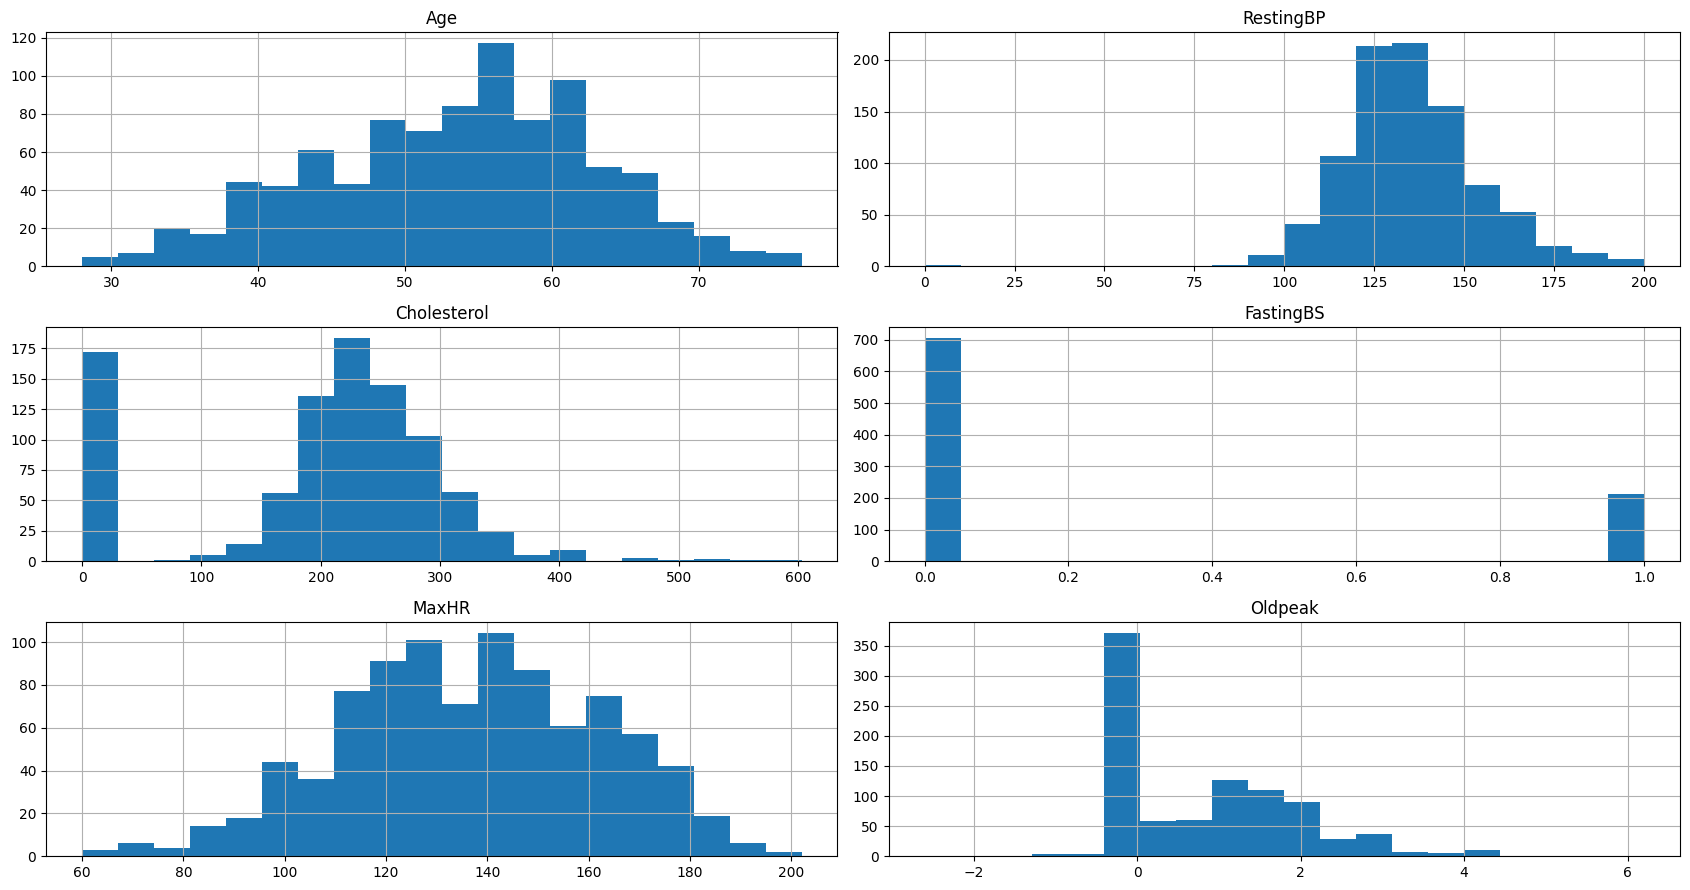

In [ ]:
# Histograms for numeric features
df[numeric_col].hist(bins=20,figsize=(17,9))
plt.tight_layout()

plt.show()

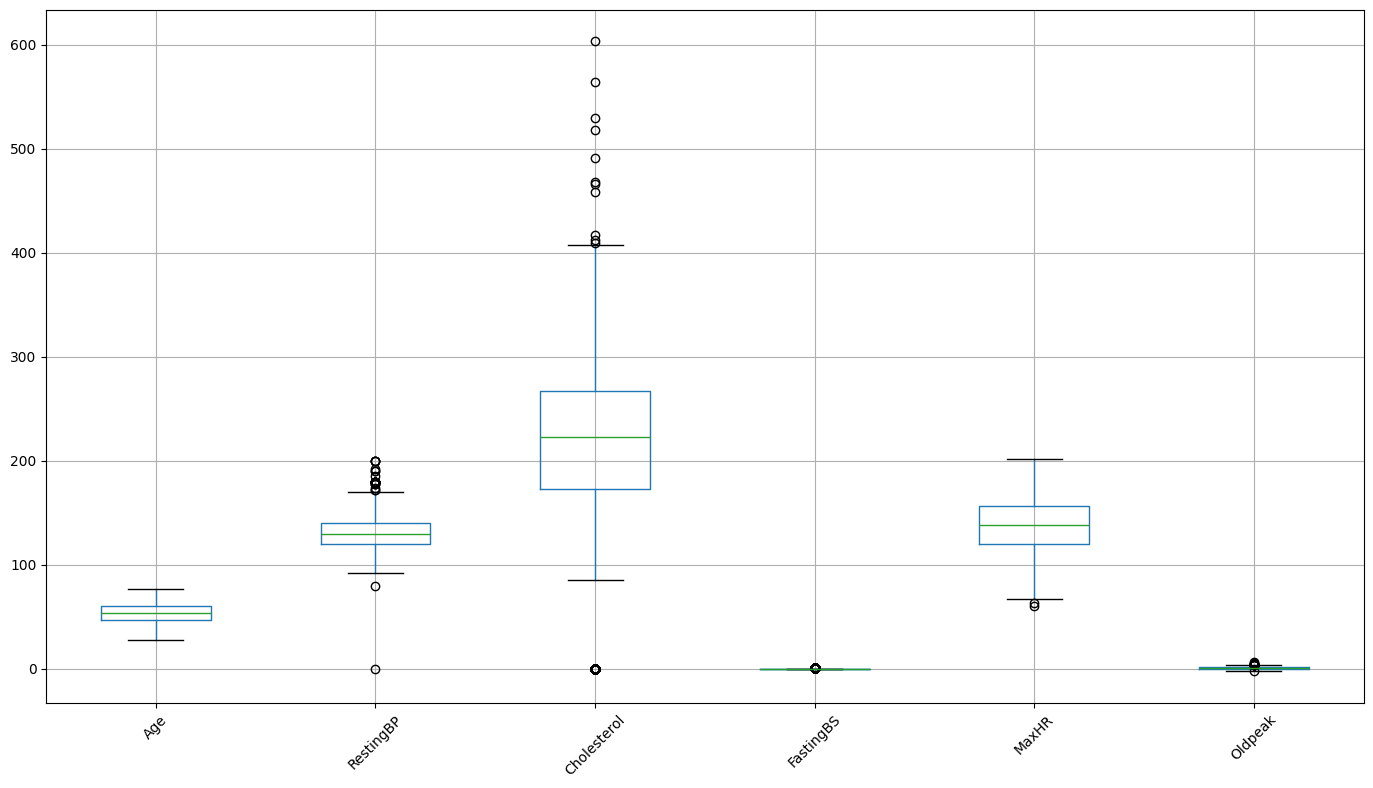

In [ ]:
# Boxplots to get a sense of spread and possible outliers
plt.figure(figsize=(17,9))
df[numeric_col].boxplot()
plt.xticks(rotation=45)

plt.show()

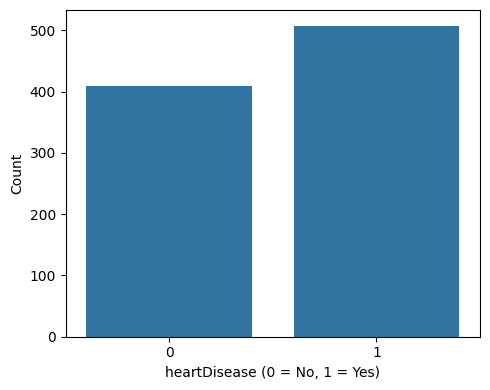

In [ ]:
# Target Distribution and Class Imbalance

plt.figure(figsize=(5,4))

sns.countplot(x=df[target_col])
plt.xlabel('heartDisease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

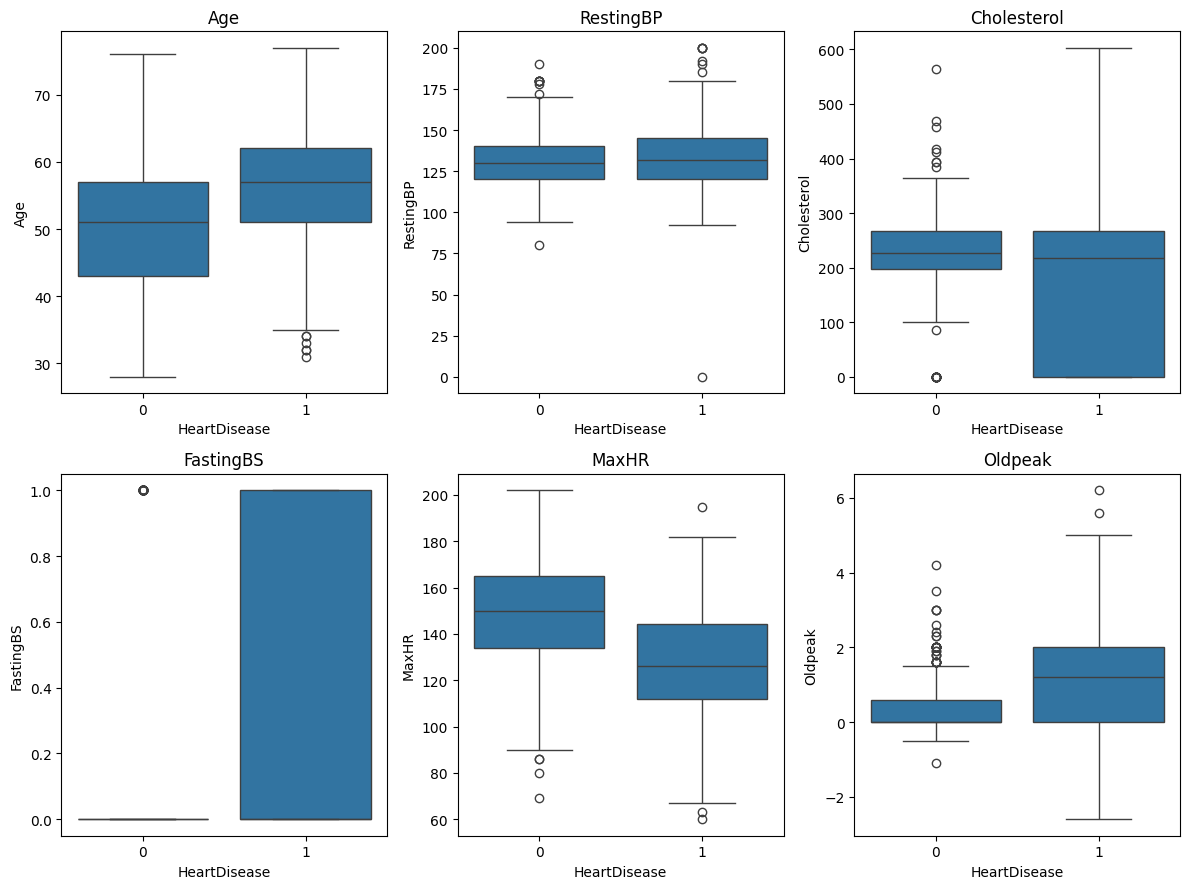

In [ ]:
# Boxplots of numeric features split by HeartDisease

plt.figure(figsize=(12,9))

for i, col in enumerate(numeric_col,1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[target_col], y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

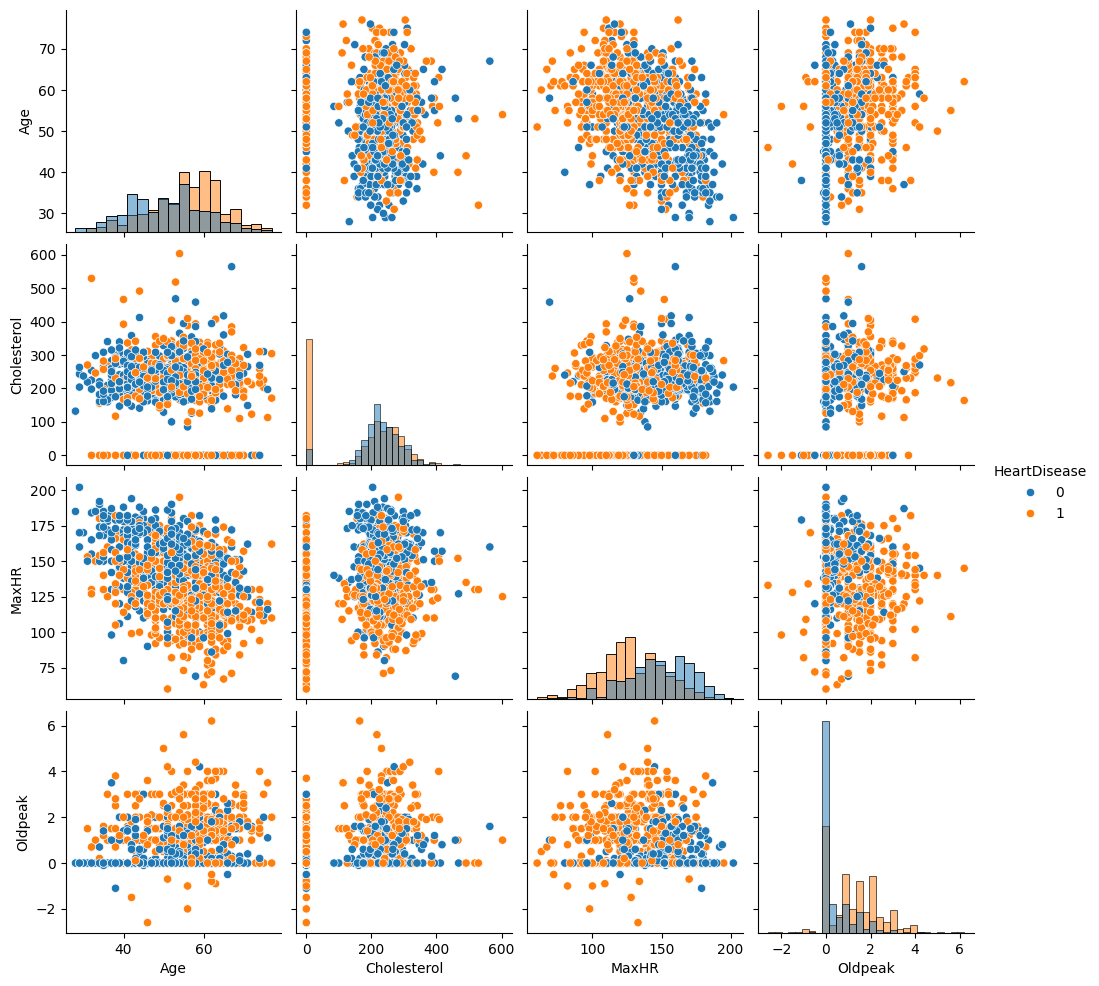

In [ ]:
#Pairplot for a Subset of Features

sns.pairplot(df[['Age','Cholesterol','MaxHR','Oldpeak','HeartDisease']],hue='HeartDisease',diag_kind='hist')
plt.show()

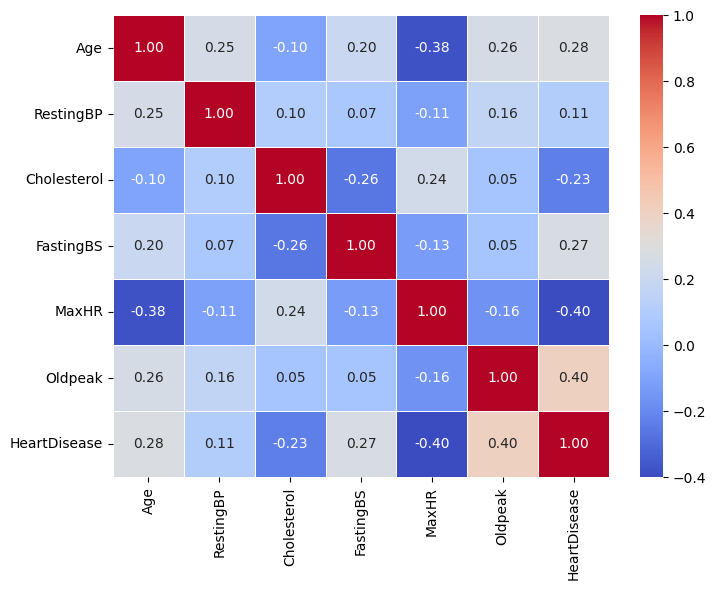

In [ ]:
#Correlation Matrix and Heatmap
corr_matrix = df[numeric_col + [target_col]].corr()

plt.figure(figsize=(8,6))

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)

plt.show()


In [ ]:
corr_matrix[target_col].sort_values(ascending=False)

,HeartDisease
HeartDisease,1.000000
Oldpeak,0.403951
Age,0.282039
FastingBS,0.267291
RestingBP,0.107589
Cholesterol,-0.232741
MaxHR,-0.400421



Proportion of HeartDisease within Sex


HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


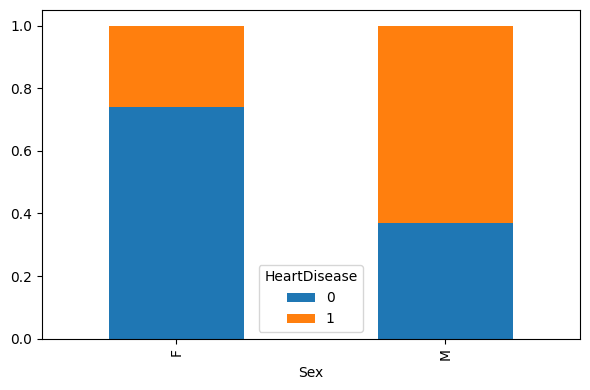


Proportion of HeartDisease within ChestPainType


HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


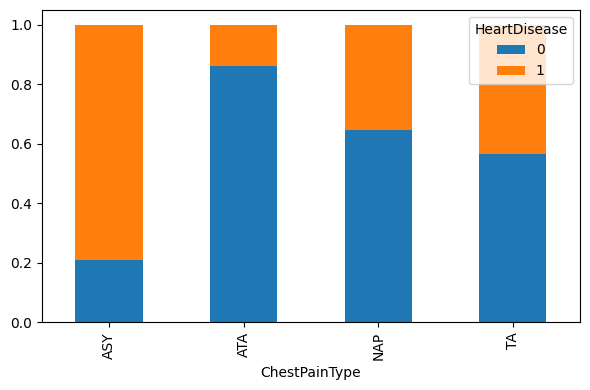


Proportion of HeartDisease within RestingECG


HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


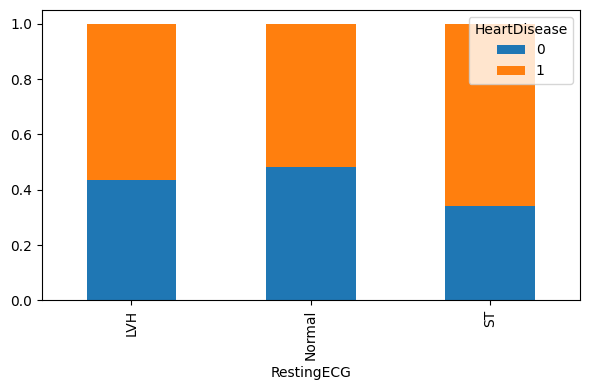


Proportion of HeartDisease within ExerciseAngina


HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


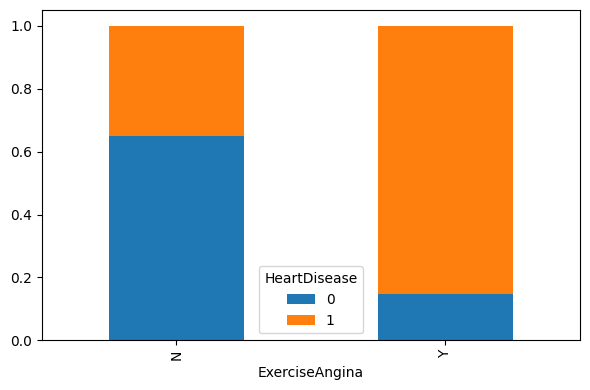


Proportion of HeartDisease within ST_Slope


HeartDisease,0,1
ST_Slope,,
Down,0.222222,0.777778
Flat,0.171739,0.828261
Up,0.802532,0.197468


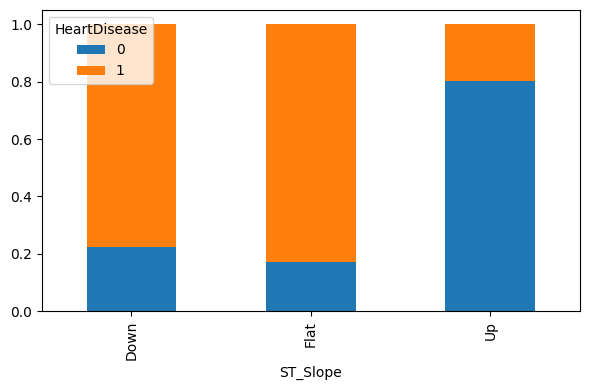

In [ ]:
#Categorical Features vs Target
for c in categoric_col:
    ct = pd.crosstab(df[c],df[target_col], normalize='index')
    print(f"\nProportion of HeartDisease within {c}")
    display(ct)

    ct.plot(kind='bar',stacked=True,figsize=(6,4))
    plt.tight_layout()
    plt.show()